# Proyecto práctico

## Unidad 3 - Aprendizaje supervisado

El proyecto práctico consiste en abordar un problema de clasificación de documentos textuales. Tenemos a nuestra disposición un dataset de noticias de prensa en español publicada por el medio "CNN Chile".

Las noticias están divididas en 7 categorías temáticas: *'pais','deportes','tendencias','tecnologias','cultura','economia','mundo'*

El proyecto se divide en dos partes:

- Utilizar al menos 3 estrategías para entrenar modelos de clasificación capaces de clasificar las noticias según su categoría temática.

- Explorar cuáles son las características que permiten explicar las decisiones de su modelo.

## 0. Evaluación

El proyecto se realiza de forma individual. Se entrega a más tardar el **lunes 30 de noviembre** en su repositorio GitHub.

**Pauta de evaluación:**

Competencia 1: Aplicar un protocolo de aprendizaje supervisado para resolver un problema clasificación estandar, utilizando un entorno de programación en Python

- < 2 : El protocolo de aprendizaje supervisado utilizado es incompleto y/o presenta errores importantes
- 2 a 3.9 : El protocolo de aprendizaje supervisado utilizado es incompleto o presenta un error importante
- 4 a 5.5 : El protocolo de aprendizaje es completo, no tiene error, pero las estrategias utilizadas son relativamente simples y el rendimiento de los modelos es perfectible.
- 5.6 a 7.0 : El protocolo de aprendizaje es completo, no tiene error y al menos una de las estrategias utilizadas a necesitado un trabajado más avanzado y/o permite obtener un mejor rendimiento.

Competencia 2: Explicar el rendimiento de un modelo de clasificación aplicando un protocolo de evaluación Precision/Recall/F-Score

- < 2 : El trabajo no presenta explicaciones del rendimiento de los modelos de clasificación
- 2 a 3.9 : El trabajo presenta algunas explicaciones pero tienen errores.
- 4 a 5.5 : El trabajo presenta explicaciones correctas del rendimiento de los modelos
- 5.6 a 7 : El trabajo presenta explicaciones correctas del rendimiento de los modelos y además presenta un método para explicar las decisiones/errores


## 1. Dataset

In [1]:
import pandas as pd

df = pd.read_csv('cnnchile_7000.csv')
df

,country,media_outlet,url,title,text,date,category
0,chile,cnnchile,https://www.cnnchile.com/pais/pdta-del-colegio...,Pdta. del Colegio de Matronas explicó los ries...,La Federación de Estudiantes de la Universidad...,2018-03-29 00:00:00.000000,pais
1,chile,cnnchile,https://www.cnnchile.com/pais/defensoria-ninez...,Defensoría de la Niñez pide al Estado velar po...,La Defensoría de la Niñez emitió este domingo ...,2020-08-02 00:00:00.000000,pais
2,chile,cnnchile,https://www.cnnchile.com/pais/cuanto-les-pagar...,¿Cuánto les pagarán a los vocales de mesa?,El monto del bono es de dos tercios de Unidad ...,2016-10-20 00:00:00.000000,pais
3,chile,cnnchile,https://www.cnnchile.com/pais/sobrino-de-aleja...,Sobrino de Alejandro Navarro intenta “funar” e...,Una nueva polémica tiene esta carrera presiden...,2017-11-13 00:00:00.000000,pais
4,chile,cnnchile,https://www.cnnchile.com/pais/analisis-sobre-e...,Análisis sobre el aumento de impuestos para al...,Especialistas recomiendan no consumir más de 2...,2014-05-05 00:00:00.000000,pais
...,...,...,...,...,...,...,...
6995,chile,cnnchile,https://www.cnnchile.com/tecnologias/playstati...,PlayStation 5 vs Xbox Series X: Mira la compar...,Las compañías ya han revelado muchos detalles ...,2020-09-18 00:00:00.000000,tecnologias
6996,chile,cnnchile,https://www.cnnchile.com/tecnologias/android-l...,Android le dará “una paliza” a Windows en 2013,Se proyecta que tras un virtual empate en 2012...,2013-04-04 00:00:00.000000,tecnologias
6997,chile,cnnchile,https://www.cnnchile.com/tecnologias/regalos-t...,Regalos tecnológicos marcaron pauta en Navidad,Tablets y smartphones fueron los regalos tecno...,2012-12-26 00:00:00.000000,tecnologias
6998,chile,cnnchile,https://www.cnnchile.com/tecnologias/jugar-con...,Jugar con Fox en Starlink vale totalmente la p...,Crecí jugando clásicos de naves como Terminal ...,2018-10-30 00:00:00.000000,tecnologias


In [2]:
from pandasql import sqldf

q="""SELECT category, count(*) FROM df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,tendencias,1000
1,tecnologias,1000
2,pais,1000
3,mundo,1000
4,economia,1000
5,deportes,1000
6,cultura,1000


En este caso queremos que nuestros algoritmos aprendan a clasificar las categorías de las noticias. Tenemos datos que no seran de utilidad en el aprendisaje como es la fecha o la url, los cuales no son indicio de a que categoría puede pertenecer una noticia, con lo cual es innecesario para nuestro caso de clasificación. También 'media_outlet' y 'country' no son datos que nos aporten debido a que todos son noticas de este preciso medio y del mismo país, con lo que también son descartados.  Debido a esto nuestro algoritmo aprenderá a clasificar noticias según categorías teniendo como información tan solo el título y texto de las noticias.

In [4]:
#Separamos Y (las categorías que debe llegar a predecir) de X (el título y texto con lo cual aprenderá a categorizar las noticias).
Y = df['category']
X = df[['title','text']]

# 1. REGRESIÓN LOGÍSTICA
* el primer algoritmo que usaré será el ya estudiado de regresión logística, la cual nos dará por medio de la función logísitca una clasificación binaria. 
* no tenemos dummy variables, con lo que simplemente avanzamos a aplicar el algoritmo

In [5]:
import spacy

nlp = spacy.load('es_core_news_md')

*  A modo de prueba veremos que tan bien define las palabras de la primera noticia.

In [4]:
doc = nlp(df['text'][1])
for token in doc:
    print(token.text, end="  ")
    print(token.pos_, end=" |    ")

La  DET |    Defensoría  PROPN |    de  ADP |    la  DET |    Niñez  PROPN |    emitió  VERB |    este  DET |    domingo  NOUN |    una  DET |    declaración  NOUN |    pública  ADJ |    condenando  VERB |    los  DET |    hechos  NOUN |    de  ADP |    violencia  NOUN |    registrados  ADJ |    en  ADP |    la  DET |    Región  PROPN |    de  ADP |    La  DET |    Araucanía  PROPN |    ,  PUNCT |    especialmente  ADV |    los  DET |    actos  NOUN |    de  ADP |    racismo  NOUN |    hacia  ADP |    el  DET |    pueblo  NOUN |    mapuche  PROPN |    .  PUNCT |    Además  ADV |    manifestó  VERB |    “  PUNCT |    su  DET |    preocupación  NOUN |    por  ADP |    la  DET |    persistente  ADJ |    incapacidad  NOUN |    del  ADP |    Estado  PROPN |    de  ADP |    Chile  PROPN |    de  ADP |    promover  VERB |    ,  PUNCT |    proteger  VERB |    y  CCONJ |    garantizar  VERB |    los  DET |    derechos  INTJ |    humanos  INTJ |    de  ADP |    los  DET |    niños  NOUN |    ,  

Ahora haremos la aplicacion del modelo bag-of-words para implementar un algoritmo supervisado

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
def feature_extraction(text):
    
    mytokens = nlp(text)

    #Guardamos las palabras como características si corresponden a ciertas categorias gramaticales
    mytokens = [ word for word in mytokens if word.pos_ in ["NOUN", "ADJ", "VERB"] ]
    
    #Transformamos las palabras en minusculas
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]

    # retorna la lista de tokens preprocesados
    return mytokens

In [9]:
bow_vector = CountVectorizer(tokenizer = feature_extraction, min_df=0., max_df=1.0)
bow_vector

CountVectorizer(min_df=0.0,
                tokenizer=<function feature_extraction at 0x7fa58a4f9290>)

* Dividimos nuestro conjunto en uno de testeo y uno de practica

In [10]:
Xtext = X["text"]
Xtitle = X["title"]

* En base a observaciones hechas a través de la práctica determinamos que la diferencia entre datos de entrenamiento y testeo ideal está en un 63%. (63% para entrenamiento, 37% para testeo)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xtext, Y, test_size=0.63)

In [13]:
from sklearn.pipeline import Pipeline

* Aplicamos el modelo de regresión logística dado por sklearn

In [10]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()

pipe = Pipeline([('vectorizing', bow_vector),
                 ('learning', model_1)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizing',
                 CountVectorizer(min_df=0.0,
                                 tokenizer=<function feature_extraction at 0x7f1ff43d5b90>)),
                ('learning', LogisticRegression())])

In [11]:
print(len(model_1.coef_[0]))

for coef in model_1.coef_[0]:
    print(coef)

16342
-0.06054010997852701
0.007950144411661518
-1.8421851070409915e-06
0.007753728492423191
-0.0004115063043012056
-0.02196227180649045
-2.8385184815910612e-05
-0.002752826333407656
-0.0008904554459014017
-0.0005561445275133908
-0.016215433780195083
-5.842231405527608e-05
1.8730054763637634e-06
-0.0002223620696378326
0.016512227075715376
-0.000463279663159644
-0.0011831098470887768
0.04311141657000258
0.05863106731196725
0.04538263298534988
-0.008688040643214441
-1.8078038416519417e-06
1.8568061662906118e-06
1.8730054763637634e-06
-0.013946576100873905
-2.675358735741151e-05
-0.0005458291278962487
0.003437455665766651
-0.014168497098650704
1.8568061662906118e-06
-0.0005362828156098887
0.017163912054010248
-0.0035573051913131656
-0.00017824422728544495
-0.01239123081624316
-0.013946576100873905
-0.0006120599798489938
-0.003419975350700088
-0.00026512241216775426
-0.00023353427011339831
-0.0014377594136152406
-1.9147555882567887e-06
-4.95814715960369e-06
0.0634520377427736
-0.0386688592

1.8568061662906118e-06
-0.0017435973397961083
-0.03864891916709301
0.004812879873244904
-0.01809053957602525
-0.002644609977665412
-0.008202143836669671
-0.014566979061177411
-1.9147555882567887e-06
-0.05995072888905668
-0.024066321818165832
0.08691573196450203
-0.0904782459402967
-0.026991988502400102
-0.027183036436620393
-0.025979253152008053
-0.025979253152008053
-0.007434897389726014
0.01409445657878291
0.014869497149121735
0.006071671492436334
-4.4762667450506434e-05
-0.003318971961239995
-0.009096651123808117
2.693179742755478e-06
-0.0011228651811734224
-2.158582868780168e-05
0.1152214631520949
-0.006529394018769213
-0.0014428967048673558
-0.00654886362751113
0.004574684308155265
-5.4410587696483576e-05
-4.17738544499213e-05
-0.002477222962365865
1.8639687206754104e-06
2.4040610965605163e-06
-0.00872033848851561
9.695105122817302e-05
-3.1785964275847367e-06
-0.17620448256852986
0.01607374108216744
-3.0499619379027258e-05
0.001262599965023048
-0.01689592884697221
0.01304151407201

-0.0714281554566776
-1.865825443083757e-06
-0.002507328217809466
0.03919114132153527
9.88470285128791e-06
0.04615516924824431
0.016134305726212606
0.006175737529833072
-0.03837359037411572
-0.0009473698042851333
-0.017826775900120967
-0.01713345488484758
0.012795089334578857
-9.818893715061343e-07
-0.003031162217453879
0.0023367508865814323
-1.9147555882567887e-06
-1.5782535266026007e-05
-0.010182742640648938
-0.010180869876857705
0.0069630733439037425
-0.0020342844324138533
-3.1590427869143667e-06
-0.001296190408600542
-1.8108850965746621e-06
0.009065555226966587
1.8567154030374685e-06
-1.0034104460850245e-06
-0.014520488600530188
-0.05056711118817836
0.01855547930182649
-0.038592457590117944
0.014305165702880051
-8.136786040642499e-05
-0.005784427431064042
-0.016486619590588805
-0.0699508156967099
-0.002669502613935008
-0.004470263280297219
-0.004470263280297219
-0.00844639823171711
-5.714184572067997e-06
0.1499875667874647
7.4607321164104015e-06
0.19188797655307438
1.856806166290611

0.24044602162318068
0.055753380753969385
-0.00010116781429810743
-0.00014202959790011525
0.006175737529833072
0.004901963181481686
0.019228269499853477
-0.0025755216283071406
-0.02292305551653772
0.042000245969313656
-0.00513301026858609
-0.003430373596950048
-0.01932437447974263
-9.207699690991674e-05
-0.0817124952681077
0.0039458724117021745
-6.184270588659643e-06
-0.0004336823724538251
0.04132318974708633
-0.013946576100873905
-0.007955464028068869
-1.4887809042037218e-06
0.015208498913240035
-0.003660664384398574
-0.00014202959790011525
-0.058081913565751556
-3.835373434176716e-06
0.02900394179653211
-3.542249873254537e-06
0.015395155328552299
-0.0008582400009475878
-4.4053963946386176e-06
-0.06584943744556553
0.04955500688894727
-9.370389740680728e-06
-0.0006568724180466178
-0.0036798868959330715
-1.4855850491705722e-05
-0.003958756339925829
3.7136123325812236e-06
-0.03357159215381481
0.02205687088730214
0.041210513358728565
-0.002420180635860015
-1.5784325570110608e-06
-0.0024056

0.2535406416575389
0.008045408118316827
0.013693132848293097
3.7338795792276936e-06
0.035620397186229044
0.0004207046861669791
-0.0006426546960745177
-1.9556366308829176e-05
-0.0028977651068172877
-0.008715263057984127
-0.0411955545777151
-0.0053656284690520575
-0.007996108469118439
-0.001736382010700267
0.01276484487424011
-0.0002699864228043039
-0.0008756178302394491
0.001538214025702088
0.00043181024890248546
-0.01587393004567208
0.31467121810819343
-0.002808676964595099
-0.025277573564944415
0.01731730259425937
-0.019645905418696014
-0.0007073023326340942
-0.00011246742362962469
-0.0004912284626991047
1.8567240255551248e-06
0.12896571219934858
-0.006937967335959922
-0.004027775143305419
-0.0014446724052652124
0.010167941760847328
-0.001339622666382561
0.0012078532230516638
-0.003432799685660167
-2.236450592503914e-06
-0.010535516620038259
-3.1709541706596013e-06
0.03088447081256875
-0.09047419507969133
-0.012174424891688363
0.16011914215003664
-0.0021666515401313267
-0.084696273429

0.018300619092243193
-0.01482376770319619
-0.09863051904308971
-0.07979868922018409
0.02784474677608035
-0.010612742485320285
0.061138575793739006
-0.04755318561338009
-0.03520049959792476
-0.00038889787189125096
-0.0004764559734498564
-0.00041562739535279186
-0.0025514317003247785
-0.14449339316849502
0.01628021346608651
-0.0008909912970586997
-0.009763815045681551
-0.005312690569673092
-0.014671674996340528
-0.005113284304377751
0.0008951531081487426
-0.03925949730644445
-0.008588796918763773
-0.03533296087706496
1.8567240255551248e-06
0.004085742672589082
0.003349208156936585
0.005864167471400073
-0.014019995838508301
-0.0035659569961116306
-5.7160268472191765e-05
-0.005085920520492965
-0.01757847330020694
0.01409445657878291
-0.002068593618022167
0.06496777167952902
-2.6542553350092145e-06
-0.004236389659333136
-0.01951653201248412
9.508708250749764e-05
-3.835373434176716e-06
0.0093830386789936
1.2748046666856554e-05
0.01662145318866165
-0.0061773856461596575
0.01737516715605814
-6

-0.03840629587913363
-0.0010088638550922362
-0.008715263057984127
0.034446811417873174
-0.0053656284690520575
7.4607321164104015e-06
-0.004866191503780035
-0.0027555931812729673
0.019319344599774423
-0.006620196469709153
-0.005089708324761649
-6.276596533864303e-05
-0.02212521175219555
-0.1017579060490581
-0.015030357446682775
-0.002377822815111853
0.008234121265975768
-0.011612124935714443
-0.07945309875147767
-9.481086194413899e-06
-0.0005815404283706229
-1.7221512389815025e-06
-8.341733083178131e-05
0.09626314045558546
-0.013946576100873905
-0.0015299930428765546
-0.0005599079030096708
-0.00020052788315512893
-0.06907549564501765
-0.00045977296248382013
-0.0165486557493817
0.0671303997107582
-0.0002155955923609678
-0.030533886069407917
-0.03823743240885085
-0.006247605916145224
-0.0027202640350007896
0.13004654459492587
-0.017307677287139736
-0.009154713097567239
-0.009321853861472492
0.005661364153338542
-3.806038332190575e-05
-0.0004631184281892916
-2.236450592503914e-06
0.0134314

-0.0008647310636451924
-0.02646220515724269
-0.0045558924390601534
-1.9123400636578e-05
0.06543612341242695
0.008577694945209031
3.017113326539706e-06
-1.3105338820159971e-06
-0.025922285632557652
-0.008147407878488385
-0.0008289942674465059
1.8567240255551248e-06
0.15686734114171272
-2.2449898774530298e-06
0.0189761949518467
-0.010403132525528267
-0.0017435973397961083
-7.628890856720136e-05
4.760680963560378e-06
0.01409445657878291
-0.0021843456851530357
-1.1131645667404461e-06
-0.015019742169379407
-0.005500158547747139
-0.0016790891167051357
-0.005675540051530034
-0.013807466555306357
3.062521128866357e-05
-0.022360108876617702
-0.0013976777942695591
0.02319399372215202
-0.0005364370749436415
-0.015940427958908633
-0.003975283412274174
-0.005175585230116661
0.010618612028019312
-0.02472938871584908
-0.033039242774587516
-0.055651867655119
0.1561329295495552
0.006892881297428151
-0.0005032249966497414
-0.0009284472656245717
6.551002492840686e-05
-0.0040737039392441925
-0.00925952225

In [12]:
from sklearn import metrics

predicted = pipe.predict(X_test)
predicted_proba = pipe.predict_proba(X_test)


print(predicted)
print(predicted_proba)

['deportes' 'pais' 'cultura' ... 'deportes' 'cultura' 'tecnologias']
[[1.28803067e-03 9.14129901e-01 7.93877534e-03 ... 2.42338651e-02
  1.65746783e-02 3.20493302e-02]
 [5.39125011e-03 4.67659366e-02 1.08904956e-02 ... 9.28054139e-01
  2.61418654e-05 4.68365576e-03]
 [9.77053254e-01 1.86804198e-02 2.14889254e-06 ... 2.97387529e-05
  3.45072570e-03 5.34039340e-04]
 ...
 [4.14068722e-02 4.60949952e-01 1.09056695e-02 ... 6.51402402e-02
  4.17146582e-02 3.59096516e-01]
 [9.99093635e-01 3.52381797e-07 1.80460970e-07 ... 3.53904848e-09
  7.06543815e-04 1.99098448e-04]
 [5.35491039e-02 1.17596146e-03 1.68178988e-03 ... 4.08868308e-03
  9.36972013e-01 1.54773103e-03]]


* El resultado en vistas generales del modelo implementado segun su accuracy

In [13]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.7197142857142858


In [14]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix)

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

[[400   2   4  17  14  18  38]
 [  4 433  15   8  13   5  21]
 [  2  11 393   8  46  23  10]
 [ 12  25  27 339  63  18  21]
 [  8  28  55  66 329  16  19]
 [  5  21  36  14  13 327  75]
 [ 40  43  15  20  13  69 298]]
              precision    recall  f1-score   support

     cultura       0.85      0.81      0.83       493
    deportes       0.77      0.87      0.82       499
    economia       0.72      0.80      0.76       493
       mundo       0.72      0.67      0.69       505
        pais       0.67      0.63      0.65       521
 tecnologias       0.69      0.67      0.68       491
  tendencias       0.62      0.60      0.61       498

    accuracy                           0.72      3500
   macro avg       0.72      0.72      0.72      3500
weighted avg       0.72      0.72      0.72      3500



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

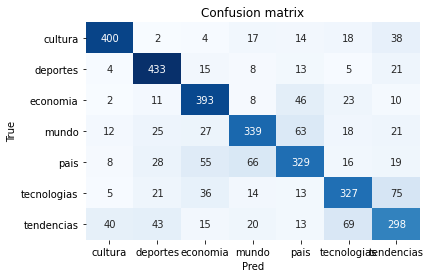

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

classes = np.unique(y_test)

cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

Debido a todo lo visto podemos encontrar que nuestro algoritmo logistico ha acertado correctamente un 72% de los datos. Esto puede entenderse mejor en el análisis dado por el classification_report de sklearn.metrics que analiza lo entregado en el matriz de confusión. Este algoritmo evalúa precision, recall y F1-score:

* Precisión: Podemos notar que el apartado de noticias de cultura es el que tiene mejor acertado sus predicciones, mientras que Tendencias queda como el pero evaluado en esta métrica con un 62% de los que evaluó como tendencia siendo realmente de ese grupo. Esto último nos dice que en principio las noticias de Cultura son mas definidas o tienen una riqueza linguistica que les hace identificables para nuestro algoritmo en comparación con tendencias, la cual aunque no siendo alarmante tenemos que tiene una buena parte de sus noticias predecidas siendo realmente de otros apartados, comportamiento que seguiremos viendo en otros modelos. Esto lo podemos entender desde la perspectiva que tendencias no tiene que ver con un tópico en una área específica de las noticias sino un apartado a lo que en el momento es de mayor impacto, como pueden ser las categorías de tecnologías, mundo o cultura.


* Recall: En ésta métrica tenemos un cambio en cuanto a quien esta mejor evaluado, sindo Deportes el mejor con un 87% siguiendole quien en precisión era mejor, el de Cultura. Esta métrica nos informa de cuanto porcentaje de todos los que entraban en un cierto tópico logramos identificar en el tópico correspondiente. En este sentido tenemos que deportes es el mejor evaluado, y se entiende debido a que, al igual que en cultura (aunque en diferentes aspectos), tiene un lenguaje que es bastante mas de nicho en el tópico dado, entre los cuales podemos notar numeros de camisetas, nombres de jugadores, y una jerga que no encontraríamos en otros tópicos, como si podría llegar a darse entre Cultura y Mundo o Cultura y País, por ejemplo. El peor evaluado en esta métrica es Tendencias una vez mas. En este sentido notamos un grupo bastante focalizado formado por Tendencias, Pais, Mundo y Tecnología, las cuales tienen un índice bajo el 70%. Esto nos dice que un porcentaje no menor de noticias correspondiente a sus tópicos están repartidas en otros tópicos, los cuales podemos intuir que corresponderan a aquellos del mismo grupo (aunque en la practica, al menos para tendencias que es la peor evaluada, esta mezclada con noticas de cultura y deportes principalmente). En otras palabras, que el algoritmo le es complicado a simple vista categorizar entre estos cuatro tópicos en mayor medida, en comparación que los tópicos restantes.


* F1: Tomando en cuenta que esta métrica evalúa según la media armónica la precisión y exhaustividad (recall) podemos ver que el valor dado esta en concordancia a lo que esperaríamos según lo analizado en las anteriores métricas. Nuevamente se ve dos grupos formados por el ya visto en recall de Tendencias, País, Mundo y Tecnología, y por otro lado el formado por Cultura, Deportes y Economía, las cuales tienen a diferencia de los primeros una mejor evaluación. En resumen podemos notar que este último grupo es el que evalúa de mejor manera sus tópicos, siendo acertados y mas limpios de noticias de tópicos diferentes en comparación con el primer grupo. Nuevamente atribuyo este comportamiento al lenguaje usado por cada uno de los tópicos, y sus titulares los cuales en el primer grupo es entendible que tiendan a tener cierta similitud que claramente fue aprendido por el algoritmo.

#  2. Naive Bayes 

In [11]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

model_nb = Pipeline([('vectorizing', bow_vector),
             ('learning', nb)])

* Nuevamente usamos el conjunto de datos de entrenamiento y testeo específicado en regresión logística

In [12]:
model_nb.fit(X_train, y_train)

Pipeline(steps=[('vectorizing',
                 CountVectorizer(min_df=0.0,
                                 tokenizer=<function feature_extraction at 0x7f2d31b20950>)),
                ('learning', MultinomialNB())])

In [13]:
predicted = model_nb.predict(X_test)

In [15]:
from sklearn import metrics
from sklearn.metrics import classification_report

confusion_matrix = metrics.confusion_matrix(y_test, predicted)

print(confusion_matrix)

print(classification_report(y_test, predicted))

[[593   1   5  19   4   7   6]
 [ 12 520   5   9  40  20  21]
 [  2   1 506  14  94  32   9]
 [ 18   2  23 446  70  32  19]
 [ 10   7  48  63 453  20  23]
 [ 34   6  26  12  32 471  67]
 [143  25   8  25  18  96 293]]
              precision    recall  f1-score   support

     cultura       0.73      0.93      0.82       635
    deportes       0.93      0.83      0.87       627
    economia       0.81      0.77      0.79       658
       mundo       0.76      0.73      0.74       610
        pais       0.64      0.73      0.68       624
 tecnologias       0.69      0.73      0.71       648
  tendencias       0.67      0.48      0.56       608

    accuracy                           0.74      4410
   macro avg       0.75      0.74      0.74      4410
weighted avg       0.75      0.74      0.74      4410



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

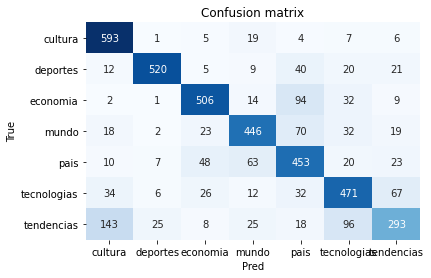

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

classes = np.unique(y_test)

cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

En general vemos que este modelo se comportó de mejor manera que el logístico, teniendo un accuracy del 75%. Viendo a fondo como se comportó en la predicción de los diferentes tópicos tenemos:

* Precisión: Los mejores evaluados son Deportes y Economía. En el caso de Deportes es asombroso el resultado, siendo un 93%, en comparación al mejor del logísitico siendo cultura con 85% el cual en el presente algoritmo baja a un 73% (lo cual sigue siendo decente). Esto último lo podemos atribuir al hecho que, como vemos en la distribución dada en la matriz de confusión, el algoritmo tuvo una aún mayor tendencia a evaluar noticias de Tendencia con aquellas de Cultura. En términos de Tendencias tenemos que otro tópico con el que mas se le es confundido es el de Tecnologías. En general podemos notar que en general se comporta de mejor manera para distinguir los tópicos en manera general menos en los tópicos que tienden a ser mas parecidos, en este caso Cultura y Tendencias, y un tanto también Tecnología.  Con todo el peor tópico evaluado según Precisión es el de País. Esto nos dice que una baja cantidad de noticias adjudicadas a este son efectivamente de País, con lo cual tiene una alta cantidad de noticias que no son propias de su tópico. Esta atribución equivocada podemos ver según la matriz de confusión que están asociadas entre Mundo, Economía y Deportes. Referente a estos resultados es entendible que el algoritmo halla adjudicado noticias Mundo y Economía como País, por lo similar de los lenguajes usados y temáticas tomadas en ellos. Referente a Deportes es entendible un tanto si lo pensamos por el hecho del uso de muchos países entre los cuales los jugadores se intercambian, haciendo interpretar erróneamente al algoritmo una noticia de País como siendo de Deportes. 


* Recall: De manera bastante interesante vemos que Cultura obtiene una mejor evaluación, siendo el mejor evaluado en esta métrica, con un 93%. ¿Qué nos dice esto? En principio que aunque hubo un porcentaje mas elevado de noticias evaluadas como Cultura que no eran realmente de este tópico ciertamente el porcentaje que efectivamente era Cultura era mayoritariamente bien atribuido. Esto nos dice que el algoritmo Naive-Bayes tiende a interpretar mas noticias a Cultura de la cantidad que inicialmente estaba compuesto. Por ejemplo, si en principio habían 30 noticias de Cultura, nuestro algoritmo evalúa 45 noticias de Cultura, con 27 de ellas siendo realmente de Cultura. Con esto vemos que Cultura es un tópico demasiado preferido por el algoritmo. En esto vemos un efecto inverso al visto en Logístico entre Cultura y Deportes en cuanto a sus valores de precisión y recall. Otro punto en donde vemos un cambio drástico y negativo en este algoritmo es en el tópico de Tendencias, el cual es evaluado con la bajísima puntuación de 48%. En pocas palabras nos dice que ni aún la mitad de noticias de Tendencias logró efectivamente catalogarlas como tal. En gran parte esta cantidad de noticias de tendencias es atribuidas a Cultura y Tecnología, lo cual explica en estos su menor evaluación en Precision en comparación a Recall. Por otro lado vemos una estimación parecida en País, los cuales tienden a estar mas atribuidas a los tópicos de Mundo y Economía, mas no en la proporción vista en Cultura, como deja ver la comparación entre Precision y Recall de estos dos. 


* F1: En esta métrica vemos como se ve afectada por las problemáticas vistas en Precision y Recall, no entregando valores que superen el 90% y entregando valores con una menor dispersión en comparación a estos dos estimadores del cual está formado.

En general es necesario recalcar que, a pesar de una peor estimación de Tendencias en comparación al modelo Logístico, este es el mejor algoritmo de los evaluados en el presente trabajo.

# 3. ADA BOOST

En el siguiente trabajo se dará una cantidad de estimadores de 100. 

In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)

model_ada = Pipeline([('vectorizing', bow_vector),
                 ('learning', ada)])

In [18]:
model_ada.fit(X_train, y_train)

Pipeline(steps=[('vectorizing',
                 CountVectorizer(min_df=0.0,
                                 tokenizer=<function feature_extraction at 0x7f2d31b20950>)),
                ('learning', AdaBoostClassifier(n_estimators=100))])

In [19]:
predicted = model_ada.predict(X_test)

In [20]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predicted)

print(confusion_matrix)

print(classification_report(y_test, predicted))

[[380  17   2  37  22  37 140]
 [  4 322   7  49 169  20  56]
 [  1   4 349  59 185  31  29]
 [ 19  15  66 215 203  37  55]
 [  3  11  61 185 255  25  84]
 [ 29  24  89  54 180 151 121]
 [ 50  27  31  45 144  81 230]]
              precision    recall  f1-score   support

     cultura       0.78      0.60      0.68       635
    deportes       0.77      0.51      0.62       627
    economia       0.58      0.53      0.55       658
       mundo       0.33      0.35      0.34       610
        pais       0.22      0.41      0.29       624
 tecnologias       0.40      0.23      0.29       648
  tendencias       0.32      0.38      0.35       608

    accuracy                           0.43      4410
   macro avg       0.49      0.43      0.45      4410
weighted avg       0.49      0.43      0.45      4410



En medidas generales este es el peor de los modelos vistos hasta ahora con un 43% de accuracy. Con todo vemos que los casos de cultura y deportes mantienen una mejor evaluación en contrapartida a una horrible predicción dada en cada uno de los siguientes tópicos, siendo de especial atención País y  Tecnologías que dieron valores cercanos al 20% de Precision y Recall respectivamente. Esto muestra como la distribución de noticias busco equipararse entre todos, manteniendose en general la cantidad de noticias asociadas a cada tópico (independiente de ser verdaderos positivos o falsos positivos) bastante cercana a la media general (de unas 300 noticias por tópico). Esto último es el principal dilema que vemos a través de la interpretación de datos. En cuanto al porque se me viene a la mente el hecho que el ADA BOOST es un algoritmo que da peso a los outliers, que en nuestro caso, debido a los tópicos y el tipo de información, puede bien haber sido interpretado erróneamente por el modelo, dando una estimación similar a cada uno por la sobrestimación de esos outliers. Probablemente (no comprobado en la práctica) es debido a la cantidad dada de estimadores en el principio. En este caso no evaluaremos cada uno de los estimadores. 

# 4. RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=10, random_state=0)

model_random_forest = Pipeline([('vectorizing', bow_vector),
                 ('learning', random_forest)])

In [22]:
model_random_forest.fit(X_train, y_train)

Pipeline(steps=[('vectorizing',
                 CountVectorizer(min_df=0.0,
                                 tokenizer=<function feature_extraction at 0x7f2d31b20950>)),
                ('learning',
                 RandomForestClassifier(min_samples_split=10, n_estimators=50,
                                        random_state=0))])

In [23]:
predicted = model_random_forest.predict(X_test)

In [24]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predicted)

print(confusion_matrix)

print(classification_report(y_test, predicted))

[[564   9   4  20   5   3  30]
 [  4 515  23  27  11  15  32]
 [  2   2 488  32  74  38  22]
 [ 33  23  56 367  68  28  35]
 [ 12  20  82  99 355  23  33]
 [ 43  33  55  21  35 351 110]
 [ 81  38  22  39  27  65 336]]
              precision    recall  f1-score   support

     cultura       0.76      0.89      0.82       635
    deportes       0.80      0.82      0.81       627
    economia       0.67      0.74      0.70       658
       mundo       0.61      0.60      0.60       610
        pais       0.62      0.57      0.59       624
 tecnologias       0.67      0.54      0.60       648
  tendencias       0.56      0.55      0.56       608

    accuracy                           0.67      4410
   macro avg       0.67      0.67      0.67      4410
weighted avg       0.67      0.67      0.67      4410



En el caso de Random Forest tuvo una mejor evaluación que ADA BOOST, lo cual le damos especial atribución a una mayor especificación de parámetros para el módelo que dieron una mejor estimación. En la evaluación de los estimadores tenemos:
* Precisión: Tenemos una vez mas, como lo vimos en el modelo Naive-Bayes, una buena estimación de deportes, lo cual nos dice que la mayoría de sus noticias atribuidas son efectivamente de la temática. Esto una vez mas es entendido por su nicho de palabras que al modelo de seguro le hace diferenciar de otras noticias. Una vez mas Cultura tiene una menor estimación, aunque bastante buena en general, que Deportes, lo cual lo podemos atribuir al hecho que tiene un alto porcentaje de noticias atribuidas como Cultura que son realmente de tendencias. Esto último también lo vemos en su Precisión de este último el cual es aún mas bajo que en el modelo Logístico y Naive-Bayes, lo cual indica que tiene un alto grado igualmente de noticias que no son de de tendencias, practicamente la mitad.


* Recall: En esta estimación tenemos datos interesantes al compararlos a precisión. En el caso de Cultura tenemos que la mayor cantidad de noticias que eran de Cultura fueron efectivamente evaluadas en su tópico correspondiente, pero en el caso de Tendencias tenemos que cercano a la mitad de sus noticias no fueron evaluadas como Tendencias, los cuales están distribuidos entre los otros tópicos, en especial en Cultura, lo cual explica una menor Precisión en comparación a su Recall en Cultura. El otro que sufre de una baja estimación de su propio tópico es Tecnologías, siendo el peor de los tópicos con una centécima menos que Tendencias. Nuevamente nos dice que gran parte de noticias correspondiente a Tecnologías fueron catalogadas en otros tópicos, los cuales viendo la matriz de confusión podemos estimar que son principalmente Tendencia, Economía y Cultura. En este sentido podemos interpretar por el uso de palabras en Tecnologías que pueda ser asociado a estos tópicos que usualmente tienen que ver con tecnología en su enfoque, como cuando una nueva tecnología como un celular de Apple se enmarca en una noticia evaluando sus precios y ventas millonarias que son obviamente de Economía, o la salida de un nuevo dispositivo que segurametne será parte de Tendencias. 


* F1: No hay mucho mas que decir que lo dicho en los análisis de Precisión y Recall. Algo que denotar tal vez es como en comparación a Naive-Bayes (el cual fue un modelo mas cercano al comportamiento de esta, aunque mejor), es como, siendo peor en términos generales, tiene el exacto mismo rendimiento según esta métrica en Tendencias y Cultura. Con lo cual nos dice que al comparar la precisión y recall de estos el comportamiento general se mantiene. Con todo lo que a veces vamos a querer no va a ser necesariamente un comportamiento que maximize los dos estimadores a la vez, sino uno que, en el caso de Cultura por ejemplo, maximize su precision, debido a que de esta manera podremos en general indentificar que el modelo no ha sobreaprendido las noticias como usualemente vimos que hace al catalogarlas de Cultura cuando no lo son. Esto último es una estimación general que podemos indentificar al analizar todos los modelos en paralelo, que Cultura es un tópico que es mas sucio (contiene noticias de otros tópicos) y a la vez mas puro (contiene una mayor cantidad de noticias correctamente evaluadas de su propio tópico), siendo de especial atención para tener en cuenta. 